First order systems
=============

In [13]:
import sympy
import matplotlib.pyplot as plt
import numpy
sympy.init_printing()
%matplotlib inline

In [14]:
t, K, tau = sympy.symbols('t, K, tau',real=True, positive=True)
s = sympy.Symbol('s')

In [15]:
u = sympy.Heaviside(t)

In [16]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [17]:
U = L(u)
U

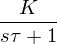

In [18]:
G = K/(tau*s + 1)
G

The inverse laplace of a transfer function is its impulse response

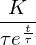

In [19]:
impulse_response = invL(G)
impulse_response

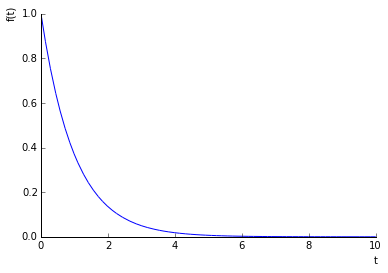

In [20]:
sympy.plot(impulse_response.subs({K: 1, tau: 1}), (t, 0, 10))

In [21]:
from IPython.html.widgets import interact

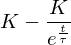

In [24]:
stepresponse

In [22]:
stepresponse = invL(G/s)
evalf = sympy.lambdify((K, tau, t), stepresponse, 'numpy')
ts = numpy.linspace(0, 10)

def firstorder(tau_in, K_in):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Step response')
    tau_height = 1 - numpy.exp(-1)
    plt.plot(ts, evalf(K_in, tau_in, ts))
    plt.axhline(K_in)
    plt.plot([0, tau_in, tau_in], [K_in*tau_height]*2 + [0], alpha=0.4)
    plt.text(0, K_in, '$K=${}'.format(K_in))
    plt.text(0, K_in*tau_height, '{:.3}$K$'.format(tau_height))
    plt.text(tau_in, 0, r'$\tau={:.3}$'.format(tau_in))
    plt.ylim(0, 10)
    plt.subplot(1, 2, 2)
    plt.title('Poles plot')
    plt.scatter(-1/tau_in, 0, marker='x', s=30)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.axis([-10, 10, -10, 10])

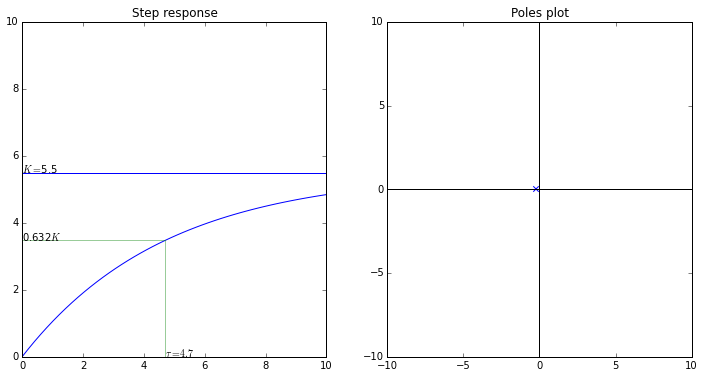

In [23]:
interact(firstorder, tau_in=(0.1, 10.), K_in=(0.1, 10.));